In [7]:
import numpy as np
import pandas as pd
import statistics
import math
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [13]:
test_df = pd.read_csv("C:/Users/HP/Desktop/TOPS - DA/airline_passenger_satisfaction.csv")
print(test_df)

            ID  Gender  Age Customer Type Type of Travel         Class  \
0            1    Male   48    First-time       Business      Business   
1            2  Female   35     Returning       Business      Business   
2            3    Male   41     Returning       Business      Business   
3            4    Male   50     Returning       Business      Business   
4            5  Female   49     Returning       Business      Business   
...        ...     ...  ...           ...            ...           ...   
129875  129876    Male   28     Returning       Personal  Economy Plus   
129876  129877    Male   41     Returning       Personal  Economy Plus   
129877  129878    Male   42     Returning       Personal  Economy Plus   
129878  129879    Male   50     Returning       Personal  Economy Plus   
129879  129880  Female   20     Returning       Personal  Economy Plus   

        Flight Distance  Departure Delay  Arrival Delay  \
0                   821                2            

In [29]:
# Mean of Column Data
print("Mean:", np.mean(test_df["Flight Distance"]))

Mean: 1190.3163920542038


In [27]:
# Median of Column Data
print("Median:", np.median(test_df["Flight Distance"]))

Median: 844.0


In [25]:
# Variance
def variance(df):
    # Number of observations
    n = len(df)
    # Mean of the data
    mean = sum(df) / n
    # Square deviations
    deviations = [(x - mean) ** 2 for x in df]
    # Variance
    variance = sum(deviations) / n  
    return variance

print("Variance:",variance(test_df["Flight Distance"]))

Variance: 994903.7842893541


In [35]:
# Standard Deviation
def stdev(df):
    var = variance(df)
    std_dev = math.sqrt(var)
    return std_dev

print("Standart Deviation:", stdev(test_df["Flight Distance"]))

Standart Deviation: 997.4486374191677


In [37]:
# Standard Error
def std_error(df):
    df_size = test_df.set_index(["Flight Distance"])
    #print(len(df_size))
    n = len(df_size)
    std_error = stdev(test_df["Flight Distance"]) / np.sqrt(n)
    return std_error

print("Standart Error:", std_error(test_df["Flight Distance"]))

Standart Error: 2.7677024705662716


In [41]:
# Decide the Shape of Distribution
def dist(df):
    
    me = np.mean(df)
    med = np.median(df)
    
    if (me) >(med):
        print("The shape of distribution of data is Right-Skewed(Positively Skewed) distribution. ")
    elif (me) < (med):
        print("The shape of distribution of data is Left-Skewed(Negatively Skewed) distribution. ")
    elif (me) == (med):
        print("The shape of distribution of data is Normal(Symmetric) distribution. ")
        
dist(test_df["Flight Distance"])

The shape of distribution of data is Right-Skewed(Positively Skewed) distribution. 


In [43]:
# Find Outliers
def detect_outlier(df, features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        q1 = np.percentile(df[c],25)
        # 3rd quartile
        q3 =  np.percentile(df[c],75)
        #IQR
        iqr = q3 - q1
        # Outlier step
        outlier_step = iqr * 1.5
        # Detect outliers and their indeces
        outlier_list_col = df[(df[c]< q1 - outlier_step) | (df[c]> q3 + outlier_step)].index
        # Store indeces
        outlier_indices.extend(outlier_list_col)
        # counter = finds how many times the element is repeated.
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items())
    
    return multiple_outliers
test_df.loc[detect_outlier(test_df, ["Flight Distance"])]

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
5,6,Male,43,Returning,Business,Business,3788,0,0.0,4,...,4,4,4,3,3,4,4,4,4,Satisfied
58,59,Female,41,Returning,Business,Business,3997,1,0.0,1,...,4,5,4,4,4,4,1,4,5,Satisfied
148,149,Male,37,Returning,Business,Business,3758,41,50.0,3,...,2,2,2,1,4,2,2,2,2,Neutral or Dissatisfied
173,174,Female,39,Returning,Business,Business,3822,6,9.0,4,...,3,4,3,2,1,3,3,3,3,Neutral or Dissatisfied
185,186,Male,42,Returning,Business,Business,3880,0,0.0,1,...,3,4,4,3,3,3,1,3,5,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129645,129646,Male,33,Returning,Business,Business,3951,0,0.0,4,...,3,4,5,4,4,4,4,4,4,Satisfied
129671,129672,Male,31,Returning,Business,Business,3800,1,0.0,1,...,5,5,4,5,5,5,1,5,4,Satisfied
129729,129730,Female,48,Returning,Business,Business,3801,100,94.0,4,...,4,2,4,2,5,4,4,4,4,Neutral or Dissatisfied
129746,129747,Male,33,Returning,Business,Business,3935,0,6.0,4,...,2,1,1,1,1,3,1,1,3,Neutral or Dissatisfied


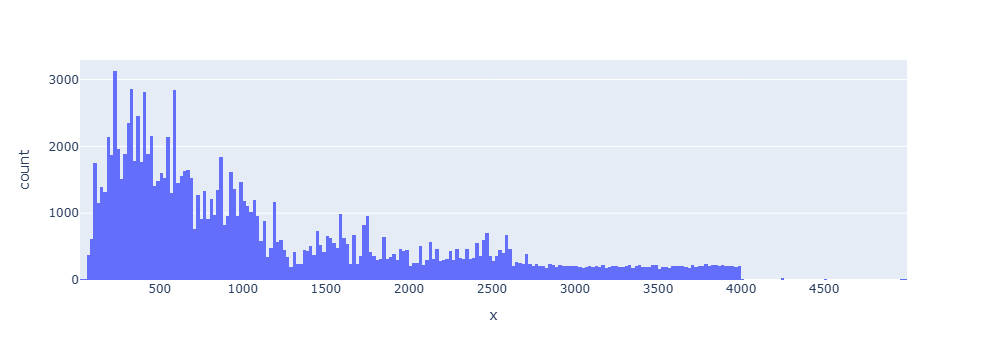

In [46]:
# Graph the Column Data and Make Comment
df = px.data.tips()
fig = px.histogram(df, x=test_df["Flight Distance"])
fig.show()

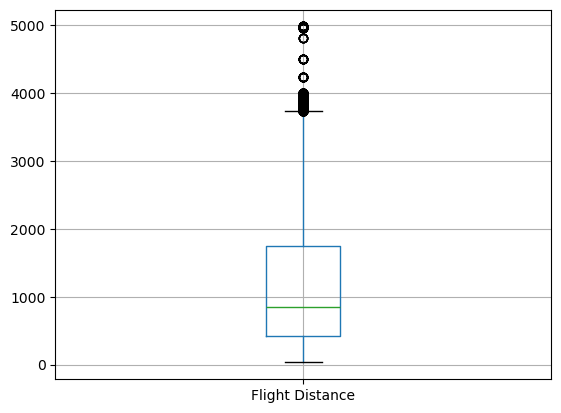

In [48]:
# Boxplot
test_df.boxplot(column = "Flight Distance")
plt.show()